In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import sys 
sys.path.append('.')

from cgiar.utils import get_dir

In [2]:
data_dir = get_dir('data/')
artifacts = get_dir('solutions/v1/#1/')

In [3]:
df = pd.read_csv(artifacts / "train_predictions.csv")

In [4]:

def load_image(id):
    filename = df[df['ID'] == id]['filename'].values[0]
    img = Image.open(data_dir / 'train' / f'{filename}')
    return img

In [5]:
# Calculate basic statistics
df.describe()

,extent,predicted_extent
count,26068.000000,26068.000000
mean,7.096056,7.633343
std,18.613229,18.776994
min,0.000000,-0.034367
25%,0.000000,0.328902
50%,0.000000,0.481953
75%,0.000000,1.303461
max,100.000000,107.129883


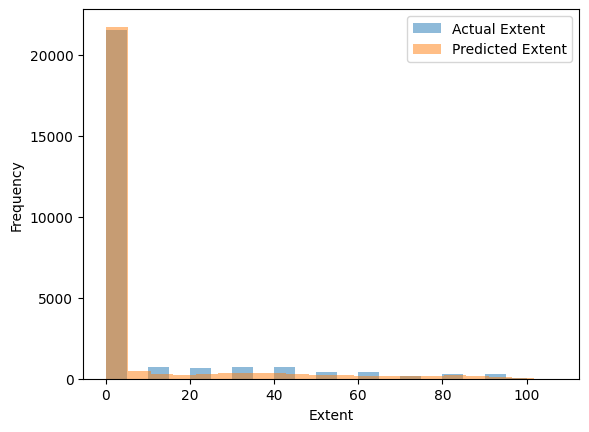

In [6]:
# Histogram
plt.hist(df['extent'], bins=20, alpha=0.5, label='Actual Extent')
plt.hist(df['predicted_extent'], bins=20, alpha=0.5, label='Predicted Extent')
plt.xlabel('Extent')
plt.ylabel('Frequency')
plt.legend()
plt.show()

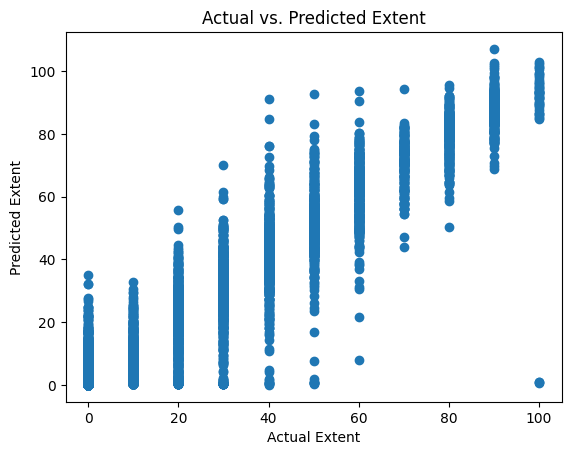

In [7]:
# Scatter Plot
plt.scatter(df['extent'], df['predicted_extent'])
plt.xlabel('Actual Extent')
plt.ylabel('Predicted Extent')
plt.title('Actual vs. Predicted Extent')
plt.show()

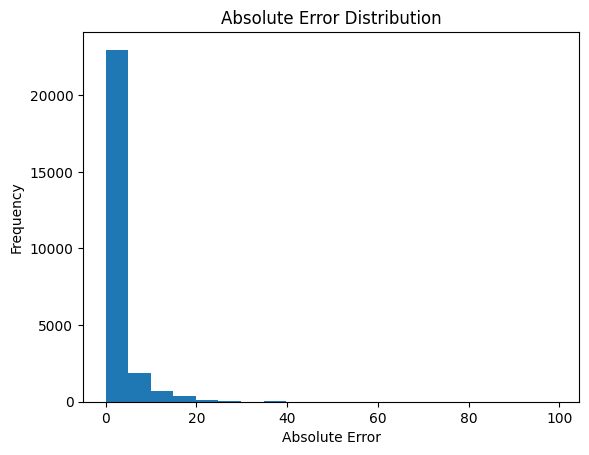

In [8]:
# Calculate absolute error
df['abs_error'] = abs(df['extent'] - df['predicted_extent'])

# Visualize error distribution
plt.hist(df['abs_error'], bins=20)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Absolute Error Distribution')
plt.show()



                  ID                         filename  extent  \
2546   ID_NAMA16UEVE   L373F01910C42S14562Rp49142.jpg     100   
962    ID_HBM4U3PMW8   L428F02948C39S14228Dp49337.jpg     100   
13404  ID_GG2JIWT6MQ   L428F02948C39S14228Dp49341.jpg     100   
18177  ID_TPD5OMKRBB  157_repeat_2_1279_4046_2615.JPG      60   
15893  ID_QAC4ND605X  L1153F00627C01S01612Rp05837.jpg      40   
6841   ID_BJDSR9OCNN   L231F04545C03S08837Rp27476.jpg      50   
10518  ID_UMJZ2P5TG1   L131F00084C39S12595Rp48295.jpg      50   
23538  ID_IRHYV8OF9L  L1122F04425C42S11604Dp33297.jpg      50   
15398  ID_5QLBY3H5KO   L231F01273C03S08942Rp24200.jpg      50   
16724  ID_R9VRBKZ7A5   L376F00304C39S12293Dp35205.jpg      50   
17778  ID_NJDFKFFG9C   L134F00839C01S09781Rp25202.jpg      50   
10779  ID_CDMOI9FPMY   L232F03938C03S08610Rp26608.jpg      50   
10719  ID_PD3JSL435G  L1130F00483C39S12499Rp41388.jpg      40   
24406  ID_VO9N4GBIU0  L1153F03614C01S08532Rp30032.jpg      50   
4203   ID_E6TQA4YAFM  L11

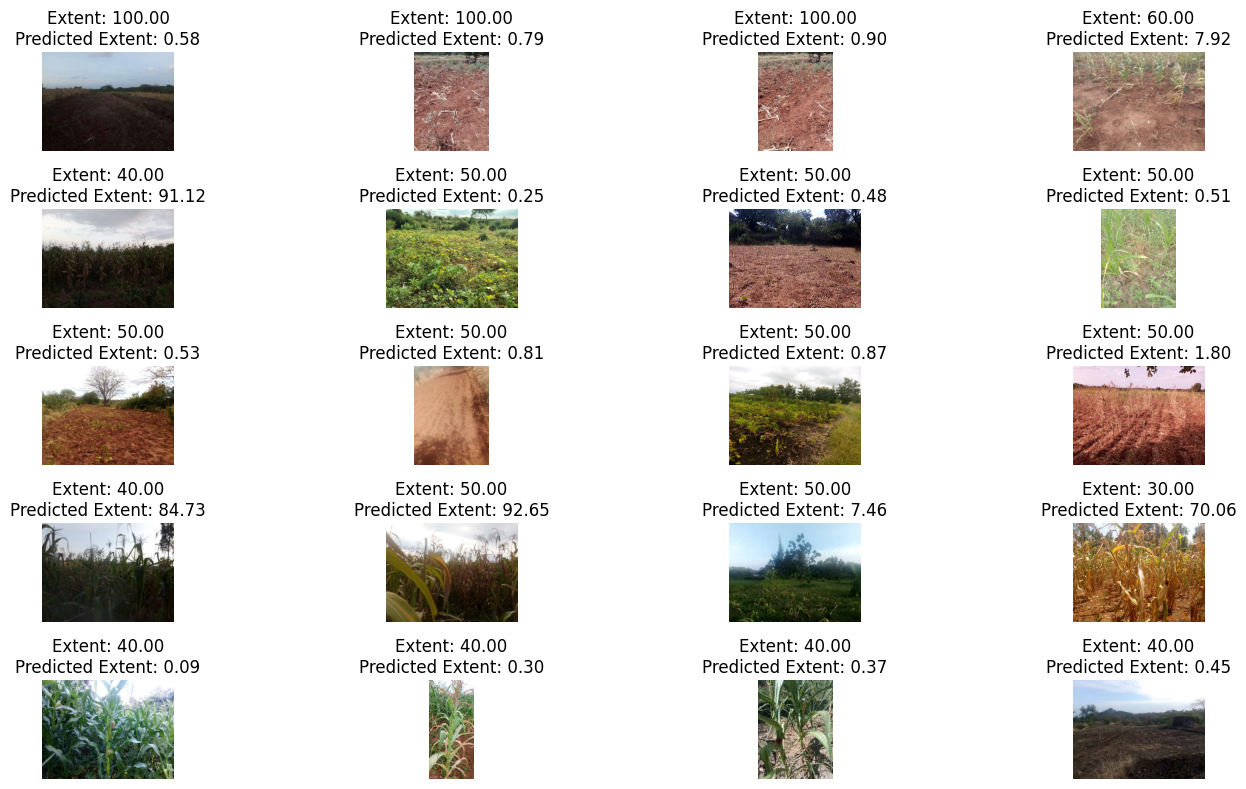

In [9]:
# Display cases with highest errors
num_top_errors = 20
top_error_cases = df.nlargest(num_top_errors, 'abs_error')
print(top_error_cases[['ID', 'filename', 'extent', 'predicted_extent', 'abs_error']])

# Create subplots
fig, axes = plt.subplots(num_top_errors // 4, 4, figsize=(15, 8))
axes = axes.ravel()

i = 0
for _, row in top_error_cases.iterrows():
    img_id = row['ID']
    extent = row['extent']
    growth_stage = row['growth_stage']
    
    predicted_extent = row['predicted_extent']
    
    # Load and display the image
    img = load_image(img_id)
    
    # Display the image with title containing extent and predicted extent
    axes[i].imshow(img)
    axes[i].set_title(f'Extent: {extent:.2f}\nPredicted Extent: {predicted_extent:.2f}')
    axes[i].axis('off')
  
    i += 1

# Adjust subplot layout
plt.tight_layout()
plt.show()

                  ID                         filename  extent  \
2776   ID_BMDRJYS01B  171_repeat_2_2322_3695_2410.JPG      90   
15453  ID_LZ48H3HG2K   L121F01824C01S02473Rp14760.jpg      90   
23931  ID_9RV2EIB98R   L133F01358C39S14730Rp48956.jpg     100   
14434  ID_R5W75POFKQ   L428F03357C39S14368Rp49214.jpg     100   
20488  ID_OTFES5H3Q7   L433F02057C39S14347Rp48361.jpg     100   
25299  ID_AME45K9Y7N   L133F01013C39S14729Rp48955.jpg     100   
20773  ID_FQEOULYQMX   L371F01552C41S14352Rp49184.jpg     100   
2187   ID_88BY00VASN   L406F02725C01S10262Rp32152.jpg     100   
21616  ID_SHXY6LNT0L   L144F00933C01S00243Rp13580.jpg      90   
21118  ID_XVD9CWVVKW   L134F00875C01S01078Rp13532.jpg      90   

       predicted_extent  abs_error  
2776          99.392677   9.392677  
15453        100.617836  10.617836  
23931         99.320740   0.679260  
14434        100.797386   0.797386  
20488         99.128769   0.871231  
25299         98.757278   1.242722  
20773        101.377434  

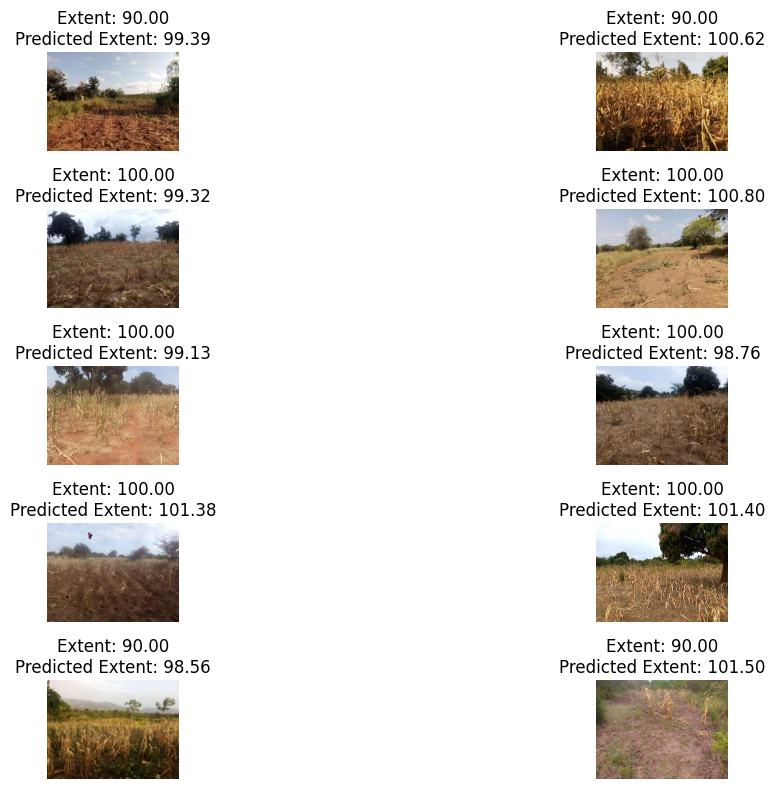

In [10]:
num_top_to_100=10

# print imageS where the predicted extent is the closest to 100
closest_to_100 = df.iloc[(df['predicted_extent']-100).abs().argsort()[:num_top_to_100]]
print(closest_to_100[['ID', 'filename', 'extent', 'predicted_extent', 'abs_error']])

# Create subplots
fig, axes = plt.subplots(num_top_to_100 // 2, 2, figsize=(15, 8))
axes = axes.ravel()

i = 0
for _, row in closest_to_100.iterrows():
    img_id = row['ID']
    extent = row['extent']
    predicted_extent = row['predicted_extent']
    
    # Load and display the image
    img = load_image(img_id)
    
    # Display the image with title containing extent and predicted extent
    axes[i].imshow(img)
    axes[i].set_title(f'Extent: {extent:.2f}\nPredicted Extent: {predicted_extent:.2f}')
    axes[i].axis('off')
  
    i += 1

# Adjust subplot layout
plt.tight_layout()
plt.show()

In [11]:
# Calculate Pearson's correlation coefficient
correlation_coefficient = df['extent'].corr(df['predicted_extent'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.9707681492175849


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df['extent'], df['predicted_extent'])
mse = mean_squared_error(df['extent'], df['predicted_extent'])
rmse = mean_squared_error(df['extent'], df['predicted_extent'], squared=False)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 1.972861565780126
MSE: 20.74780283550217
RMSE: 4.5549756130524095


In [13]:
df['error'] = abs(df['extent'] - df['predicted_extent'])
error_by_growth_stage = df.groupby('growth_stage')['error'].mean().reset_index()
display(error_by_growth_stage)

,growth_stage,error
0,F,1.809900
1,M,4.060309
2,S,0.822890
3,V,1.054479


In [14]:
error_by_growth_stage = df.groupby('season')['error'].mean().reset_index()
display(error_by_growth_stage)

,season,error
0,LR2020,2.014977
1,LR2021,2.115262
2,SR2020,1.844006
3,SR2021,1.930265
